In [13]:
printmd('Face Recognition Model with Keras and CNN')
printmd('10 layers; 3 conv2d, 3 maxpoolings, 2 dense and 1 each of flatten and dropout ')
printmd('Total parameters 900,626, all trainable. ')
printmd('Classification Report, Confusion Matrix for all 20 classes') 
printmd('Roc Curves with Auc values and Precision-Recall curves for all 20 classes')
printmd('Displaying Training, Testing and  Misidentified Faces')
printmd(' ')
printmd('Accuracy of the Model is 96.5 %. ')


## <span style="color:red">Face Recognition Model with Keras and CNN</span>

## <span style="color:red">10 layers; 3 conv2d, 3 maxpoolings, 2 dense and 1 each of flatten and dropout </span>

## <span style="color:red">Total parameters 900,626, all trainable. </span>

## <span style="color:red">Classification Report, Confusion Matrix for all 20 classes</span>

## <span style="color:red">Roc Curves with Auc values and Precision-Recall curves for all 20 classes</span>

## <span style="color:red">Displaying Training, Testing and  Misidentified Faces</span>

## <span style="color:red"> </span>

## <span style="color:red">Accuracy of the Model is 96.5 %. </span>

In [12]:
################################################################################################################################
# Import some of the libraries such as tf addon, numpy, pandas, tqdm_callback, matplotlib, seaborn etc. 
################################################################################################################################
import os
from numpy import load
import matplotlib.pyplot as plt
import pandas as pd
import tqdm 
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()
import time
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.1)
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('## <span style="color:red">'+string+'</span>'))
import warnings
warnings.filterwarnings('ignore')

In [14]:
################################################################################################################################
# import libraries for CNN model building
################################################################################################################################
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras.models import load_model 
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
from sklearn.metrics import (precision_recall_curve, recall_score, f1_score, precision_recall_fscore_support)

In [16]:
################################################################################################################################
# import zipfile and unzip the ORL_faces.npz file
################################################################################################################################
import zipfile

zip_file = './datasets/ORL_faces.npz'
zipfile.ZipFile(zip_file).extractall()

In [17]:
################################################################################################################################
# load the extracted ORL_faces train and test files and labels
################################################################################################################################
testX  = load('./datasets/testX.npy')
testY  = load('./datasets/testY.npy')
trainX = load('./datasets/trainX.npy')
trainY = load('./datasets/trainY.npy')

In [18]:
################################################################################################################################
# check the file lengths of the test and train files
################################################################################################################################
len(testX), len(trainX)

(160, 240)

In [19]:
################################################################################################################################
# look at the data as is in test file by creating a dataframe from it.
################################################################################################################################
tesx = pd.DataFrame(testX)
tesx

0      1      2      3      4      5      6      7      8      9      \
0     41.0   47.0   47.0   46.0   44.0   49.0   48.0   58.0   61.0   49.0   
1     44.0   43.0   32.0   32.0   30.0   30.0   38.0   40.0   48.0   66.0   
2     42.0   41.0   44.0   46.0   48.0   39.0   37.0   37.0   33.0   37.0   
3     34.0   34.0   33.0   32.0   38.0   40.0   39.0   49.0   54.0   57.0   
4     49.0   46.0   52.0   48.0   45.0   52.0   48.0   50.0   46.0   49.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
155  109.0  111.0  111.0  116.0  111.0  112.0  110.0  113.0  112.0  113.0   
156  107.0  106.0  105.0  107.0  106.0  106.0  108.0  107.0  108.0  106.0   
157  101.0  100.0  103.0   98.0  101.0  101.0  103.0  100.0  103.0  102.0   
158  105.0  108.0  106.0  108.0  106.0  107.0  109.0  107.0  108.0  109.0   
159  113.0  114.0  111.0  111.0  113.0  111.0  116.0  110.0  114.0  111.0   

     ...  10294  10295  10296  10297  10298  10299  10300  10301  10302  10303  
0    ...   27.0   34.0   35.0   34.0   36.0   34.0   39.0   35.0   37.0   38.0  
1    ...   37.0   42.0   42.0   40.0   33.0   29.0   37.0   43.0   43.0   37.0  
2    ...   42.0   33.0   39.0   39.0   40.0   41.0   43.0   42.0   43.0   41.0  
3    ...   42.0   44.0   38.0   30.0   37.0   30.0   36.0   37.0   40.0   33.0  
4    ...   40.0   40.0   41.0   44.0   44.0   44.0   44.0   47.0   41.0   46.0  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
155  ...   33.0   33.0   38.0   32.0   42.0   32.0   39.0   51.0   50.0   51.0  
156  ...  179.0  183.0  200.0  112.0   27.0   41.0   46.0   43.0   49.0   55.0  
157  ...  171.0  178.0  175.0  177.0  177.0  183.0   34.0   31.0   40.0   42.0  
158  ...  175.0  180.0  187.0  180.0   32.0   38.0   39.0   44.0   40.0   47.0  
159  ...   34.0   31.0   64.0   63.0   56.0   57.0   53.0   62.0   81.0   89.0  

[160 rows x 10304 columns]

In [20]:
################################################################################################################################
# normalize the test and train files data to range 0 to 1 by dividing with 255
################################################################################################################################

trainX = np.array(trainX)/255
testX = np.array(testX)/255

In [21]:
################################################################################################################################
# look at the test data file one more time after normalizing. 
################################################################################################################################
tesx = pd.DataFrame(testX)
tesx

0         1         2         3         4         5         6      \
0    0.160784  0.184314  0.184314  0.180392  0.172549  0.192157  0.188235   
1    0.172549  0.168627  0.125490  0.125490  0.117647  0.117647  0.149020   
2    0.164706  0.160784  0.172549  0.180392  0.188235  0.152941  0.145098   
3    0.133333  0.133333  0.129412  0.125490  0.149020  0.156863  0.152941   
4    0.192157  0.180392  0.203922  0.188235  0.176471  0.203922  0.188235   
..        ...       ...       ...       ...       ...       ...       ...   
155  0.427451  0.435294  0.435294  0.454902  0.435294  0.439216  0.431373   
156  0.419608  0.415686  0.411765  0.419608  0.415686  0.415686  0.423529   
157  0.396078  0.392157  0.403922  0.384314  0.396078  0.396078  0.403922   
158  0.411765  0.423529  0.415686  0.423529  0.415686  0.419608  0.427451   
159  0.443137  0.447059  0.435294  0.435294  0.443137  0.435294  0.454902   

        7         8         9      ...     10294     10295     10296  \
0    0.227451  0.239216  0.192157  ...  0.105882  0.133333  0.137255   
1    0.156863  0.188235  0.258824  ...  0.145098  0.164706  0.164706   
2    0.145098  0.129412  0.145098  ...  0.164706  0.129412  0.152941   
3    0.192157  0.211765  0.223529  ...  0.164706  0.172549  0.149020   
4    0.196078  0.180392  0.192157  ...  0.156863  0.156863  0.160784   
..        ...       ...       ...  ...       ...       ...       ...   
155  0.443137  0.439216  0.443137  ...  0.129412  0.129412  0.149020   
156  0.419608  0.423529  0.415686  ...  0.701961  0.717647  0.784314   
157  0.392157  0.403922  0.400000  ...  0.670588  0.698039  0.686275   
158  0.419608  0.423529  0.427451  ...  0.686275  0.705882  0.733333   
159  0.431373  0.447059  0.435294  ...  0.133333  0.121569  0.250980   

        10297     10298     10299     10300     10301     10302     10303  
0    0.133333  0.141176  0.133333  0.152941  0.137255  0.145098  0.149020  
1    0.156863  0.129412  0.113725  0.145098  0.168627  0.168627  0.145098  
2    0.152941  0.156863  0.160784  0.168627  0.164706  0.168627  0.160784  
3    0.117647  0.145098  0.117647  0.141176  0.145098  0.156863  0.129412  
4    0.172549  0.172549  0.172549  0.172549  0.184314  0.160784  0.180392  
..        ...       ...       ...       ...       ...       ...       ...  
155  0.125490  0.164706  0.125490  0.152941  0.200000  0.196078  0.200000  
156  0.439216  0.105882  0.160784  0.180392  0.168627  0.192157  0.215686  
157  0.694118  0.694118  0.717647  0.133333  0.121569  0.156863  0.164706  
158  0.705882  0.125490  0.149020  0.152941  0.172549  0.156863  0.184314  
159  0.247059  0.219608  0.223529  0.207843  0.243137  0.317647  0.349020  

[160 rows x 10304 columns]

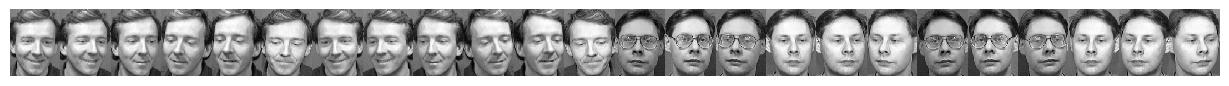

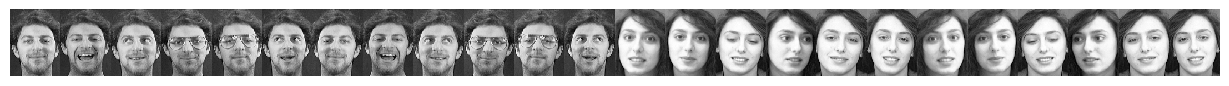

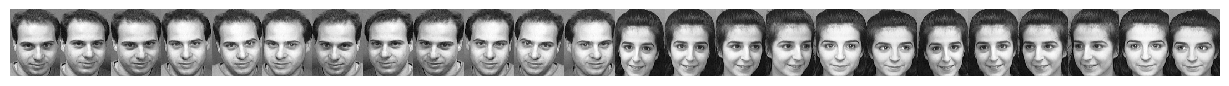

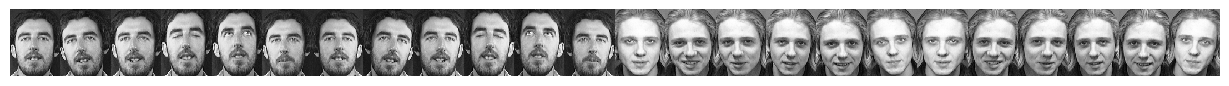

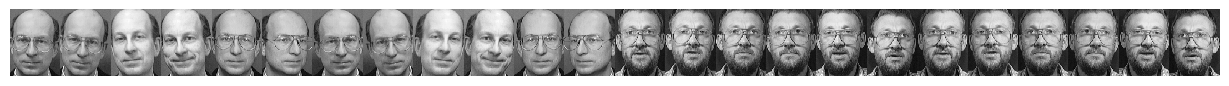

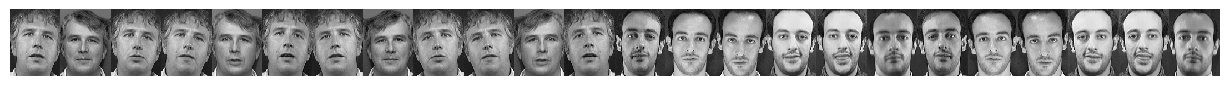

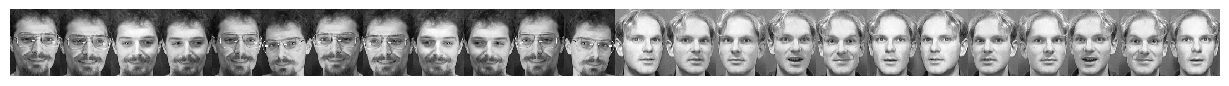

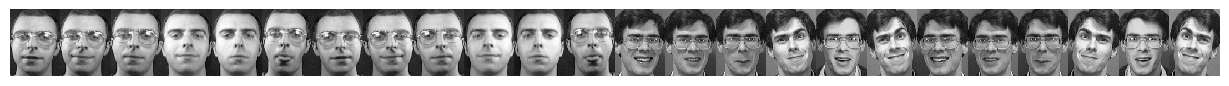

In [22]:
################################################################################################################################
# plot all faces from the train dataset
################################################################################################################################
for j in range(0,10):
    plt.subplots_adjust(hspace=1e-20,wspace=1e-20,bottom=.01,top=1.9,left=.01,right=1.9) 
    for i in range(0,24): 
        k = j+1
        plt.subplot(k,24,i+1) 
        a=j*24 + i        
        plt.axis('off')
        img=trainX[a,:].reshape(112,92,1)        
        plt.imshow(img,'gray',interpolation='nearest',origin='upper',extent=(-0.5, 0.5, -0.55, 0.55),aspect=1.2)  
    
    plt.show() 
plt.show() 

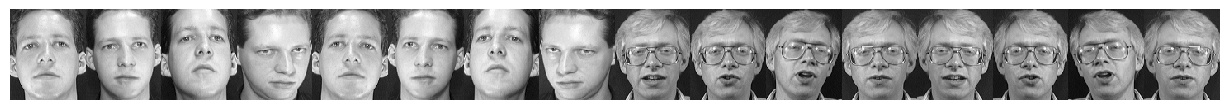

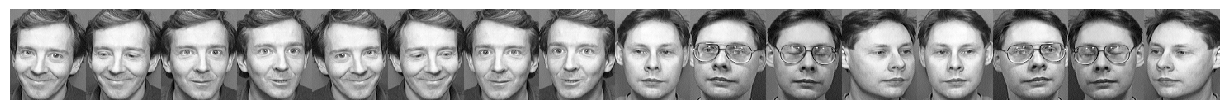

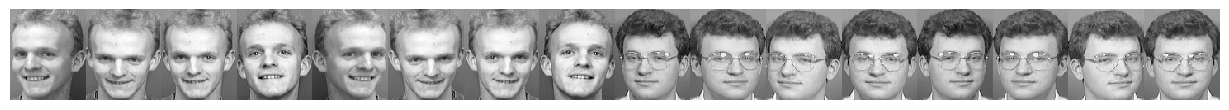

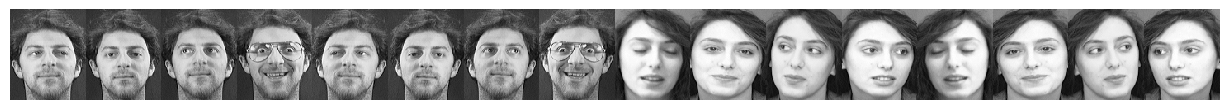

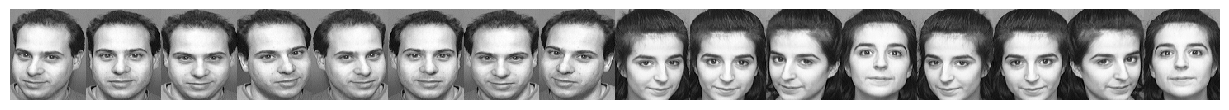

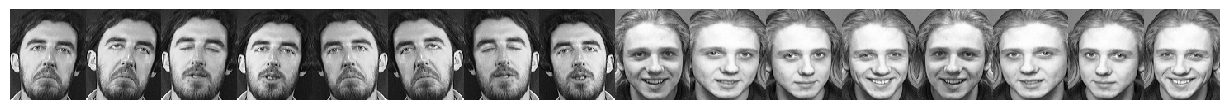

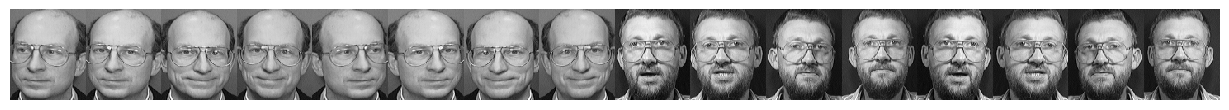

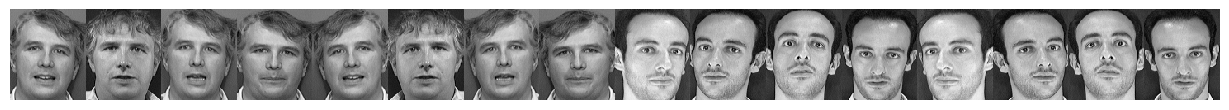

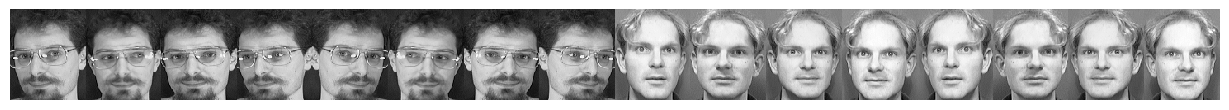

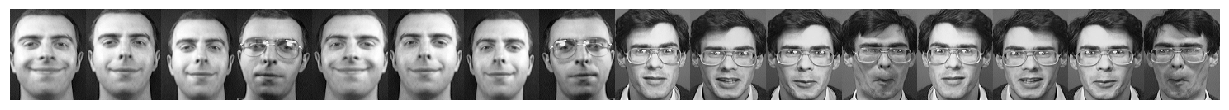

In [23]:
################################################################################################################################
# plot all faces from the test dataset
################################################################################################################################
for j in range(0,10):
    plt.subplots_adjust(hspace=1e-20,wspace=1e-20,bottom=.01,top=1.9,left=.01,right=1.9)
    for i in range(0,16): 
        k = j+1
        plt.subplot(k,16,i+1) 
        a=j*16 + i
        plt.axis('off')
        img=testX[a,:].reshape(112,92,1)
        plt.imshow(img,'gray', interpolation='nearest',origin='upper',extent=(-0.5, 0.5, -0.45, 0.55),aspect=1.2) 
    
    plt.show()
plt.show()

In [24]:
################################################################################################################################
# look at the shapes of the test and train data and label files
################################################################################################################################
testX.shape, trainX.shape, testY.shape, trainY.shape

((160, 10304), (240, 10304), (160,), (240,))

In [33]:
################################################################################################################################
# split the train files to train and validate in the ratio of 90% to 10%. , random_state=1,stratify=trainY
################################################################################################################################
xtrain, xval, ytrain, yval= train_test_split(trainX, trainY, test_size=.1,stratify=trainY)

In [34]:
################################################################################################################################
# check the shapes of the train and test files
################################################################################################################################
xtrain.shape, xval.shape, ytrain.shape, yval.shape

((216, 10304), (24, 10304), (216,), (24,))

In [35]:
################################################################################################################################
# reshape the train, test and validation files as (samples,112,92,1)
################################################################################################################################
input_shape=(112, 92, 1)

xtrain = xtrain.reshape(xtrain.shape[0], input_shape[0],input_shape[1],input_shape[2])  
testX =    testX.reshape(testX.shape[0], input_shape[0],input_shape[1],input_shape[2])
xval =       xval.reshape(xval.shape[0], input_shape[0],input_shape[1],input_shape[2])


In [36]:
################################################################################################################################
# verify the shapes to make sure they are reshaped as desired
################################################################################################################################
xtrain.shape, xval.shape, ytrain.shape, yval.shape, testX.shape, testY.shape 

((216, 112, 92, 1), (24, 112, 92, 1), (216,), (24,), (160, 112, 92, 1), (160,))

In [37]:
printmd('Building CNN Face Recognition Model with Keras. ')
printmd('10 layers; 3 conv2d, 3 maxpoolings, 2 dense and 1 each of flatten and dropout. ')
printmd('Total parameters 900,626, all trainable. ')

## <span style="color:red">Building CNN Face Recognition Model with Keras. </span>

## <span style="color:red">10 layers; 3 conv2d, 3 maxpoolings, 2 dense and 1 each of flatten and dropout. </span>

## <span style="color:red">Total parameters 900,626, all trainable. </span>

In [38]:
################################################################################################################################
# Build the CNN Face recognition model with 10 layers (3 each of conv2d and maxpooling, 2 dense and 1 each of flatten and 
# Dropout. Total parameters 900,626, all trainable.
################################################################################################################################
model = Sequential()
input_shape=(112, 92, 1)

model.add(Convolution2D(90, kernel_size=(3,3), activation=tf.nn.relu, input_shape= input_shape)) 
model.add(MaxPooling2D(pool_size=2))


model.add(Convolution2D(60, kernel_size=(3,3), activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=2))

model.add(Convolution2D(30, kernel_size=(3,3), activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(256, activation=tf.nn.relu))
model.add(Dropout(0.5))

model.add(Dense(20, activation=tf.nn.softmax))  


In [39]:
################################################################################################################################
# define the path for the trained model from local directory and also define the checkpoints on val_loss
################################################################################################################################
FILEPATH="./Weights/weights.Face_Proj_CNN.best.hdf5"

checkpoint = ModelCheckpoint(FILEPATH, monitor='loss', verbose=1, save_best_only=True, mode='min')

callback_list = [tqdm_callback, checkpoint]

In [40]:
################################################################################################################################
# load the trained model
################################################################################################################################
model = load_model(FILEPATH)

In [41]:
################################################################################################################################
# compile the model using Adam optimizer, Learning rate .0002, loss as sparse_categorical_crossentropy and accuracy metrics
################################################################################################################################
model.compile(optimizer=Adam(lr=0.0000002,beta_1=0.99),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
################################################################################################################################
# print the summary of the loaded module
################################################################################################################################
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 90, 90)       900       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 45, 90)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 43, 60)        48660     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 21, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 19, 30)        16230     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 9, 30)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3240)              0

In [43]:
################################################################################################################################
# fit the model for just 20 epochs as really do not intend to train anymore. Just for evaluation purpose only
################################################################################################################################
start = time.time()

history=model.fit(xtrain, ytrain, batch_size=2,epochs=30, verbose=0,callbacks=callback_list,validation_data=(xval,yval))


Training:   0%|                                                                                0/30 ETA: ?s,  …

Epoch 1/30


0/108                                                                                                        E…


Epoch 00001: loss improved from inf to 0.00009, saving model to ./Weights\weights.Face_Proj_CNN.best.hdf5
Epoch 2/30


0/108                                                                                                        E…


Epoch 00002: loss improved from 0.00009 to 0.00007, saving model to ./Weights\weights.Face_Proj_CNN.best.hdf5
Epoch 3/30


0/108                                                                                                        E…


Epoch 00003: loss improved from 0.00007 to 0.00006, saving model to ./Weights\weights.Face_Proj_CNN.best.hdf5
Epoch 4/30


0/108                                                                                                        E…


Epoch 00004: loss did not improve from 0.00006
Epoch 5/30


0/108                                                                                                        E…


Epoch 00005: loss did not improve from 0.00006
Epoch 6/30


0/108                                                                                                        E…


Epoch 00006: loss did not improve from 0.00006
Epoch 7/30


0/108                                                                                                        E…


Epoch 00007: loss did not improve from 0.00006
Epoch 8/30


0/108                                                                                                        E…


Epoch 00008: loss did not improve from 0.00006
Epoch 9/30


0/108                                                                                                        E…


Epoch 00009: loss did not improve from 0.00006
Epoch 10/30


0/108                                                                                                        E…


Epoch 00010: loss did not improve from 0.00006
Epoch 11/30


0/108                                                                                                        E…


Epoch 00011: loss improved from 0.00006 to 0.00003, saving model to ./Weights\weights.Face_Proj_CNN.best.hdf5
Epoch 12/30


0/108                                                                                                        E…


Epoch 00012: loss did not improve from 0.00003
Epoch 13/30


0/108                                                                                                        E…


Epoch 00013: loss did not improve from 0.00003
Epoch 14/30


0/108                                                                                                        E…


Epoch 00014: loss did not improve from 0.00003
Epoch 15/30


0/108                                                                                                        E…


Epoch 00015: loss did not improve from 0.00003
Epoch 16/30


0/108                                                                                                        E…


Epoch 00016: loss did not improve from 0.00003
Epoch 17/30


0/108                                                                                                        E…


Epoch 00017: loss did not improve from 0.00003
Epoch 18/30


0/108                                                                                                        E…


Epoch 00018: loss did not improve from 0.00003
Epoch 19/30


0/108                                                                                                        E…


Epoch 00019: loss did not improve from 0.00003
Epoch 20/30


0/108                                                                                                        E…


Epoch 00020: loss improved from 0.00003 to 0.00002, saving model to ./Weights\weights.Face_Proj_CNN.best.hdf5
Epoch 21/30


0/108                                                                                                        E…


Epoch 00021: loss did not improve from 0.00002
Epoch 22/30


0/108                                                                                                        E…


Epoch 00022: loss did not improve from 0.00002
Epoch 23/30


0/108                                                                                                        E…


Epoch 00023: loss did not improve from 0.00002
Epoch 24/30


0/108                                                                                                        E…


Epoch 00024: loss did not improve from 0.00002
Epoch 25/30


0/108                                                                                                        E…


Epoch 00025: loss did not improve from 0.00002
Epoch 26/30


0/108                                                                                                        E…


Epoch 00026: loss did not improve from 0.00002
Epoch 27/30


0/108                                                                                                        E…


Epoch 00027: loss did not improve from 0.00002
Epoch 28/30


0/108                                                                                                        E…


Epoch 00028: loss did not improve from 0.00002
Epoch 29/30


0/108                                                                                                        E…


Epoch 00029: loss did not improve from 0.00002
Epoch 30/30


0/108                                                                                                        E…


Epoch 00030: loss did not improve from 0.00002


In [44]:
################################################################################################################################
# display how many minutes it took to train for 20 epochs
################################################################################################################################
print ('Model Fit time in Minutes : ', (time.time() - start)/60)

Model Fit time in Minutes :  3.392767028013865


In [45]:
################################################################################################################################
# evaluate the trained model on training and testing datasets
################################################################################################################################
train_loss, train_acc = model.evaluate(xtrain,ytrain, batch_size=2,verbose=0,callbacks=[tqdm_callback])
test_loss, test_acc = model.evaluate(testX,testY,batch_size=2, verbose=0,callbacks=[tqdm_callback])
print('Train Accu: %.3f, Test Accu: %.3f' % (train_acc, test_acc))
print('Train Loss: %.3f, Test Loss: %.3f' % (train_loss, test_loss))

0/108                                                                                              ETA: ?s - E…

0/80                                                                                               ETA: ?s - E…

Train Accu: 1.000, Test Accu: 0.956
Train Loss: 0.000, Test Loss: 0.223


In [63]:
################################################################################################################################
# plot the accuracy and validation accuracy of the model
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Face Recognition Model Accuracy vs Validation Accuracy with 20 epochs',fontweight='bold')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid(True)
plt.legend(bbox_to_anchor=(0.9, .54, 0.5, 0.5))

plt.show()

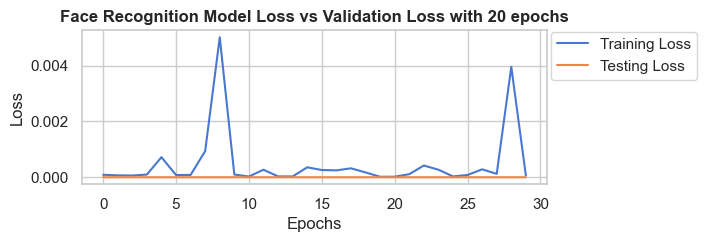

In [64]:
################################################################################################################################
# plot the loss and validation loss of the model for 20 epochs
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Face Recognition Model Loss vs Validation Loss with 20 epochs',fontweight='bold')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid(True)
plt.legend(bbox_to_anchor=(0.84, .54, 0.5, 0.5))

plt.show()

In [65]:
################################################################################################################################
# predict the model probalilities and classes
################################################################################################################################

pred = model.predict(testX)
predclass = model.predict_classes(testX)


In [66]:
################################################################################################################################
# print the shapes of the probabilities, classes and ground truth files 
################################################################################################################################
pred.shape,testY.shape,predclass.shape

((160, 20), (160,), (160,))

In [67]:
################################################################################################################################
# print the predicted classes file
################################################################################################################################

predclass

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4, 17,  4,  4,  4, 17,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  7,  9,  9,  9,  7, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 16, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 18, 18,  7, 18, 18, 18,  7, 18, 19,
       19, 19, 19, 19, 19, 19, 19], dtype=int64)

In [68]:
################################################################################################################################
# print the classes of the ground truth file
################################################################################################################################

testY

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 19,
       19, 19, 19, 19, 19, 19, 19], dtype=uint8)

In [85]:
################################################################################################################################
# plot the confusion matrix in ways - one using seaborn library and another just printing the matrix
################################################################################################################################

sns.set(style='whitegrid', palette='muted', font_scale=.8)
plt.figure(figsize=(6, 6))
LABELS=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
conf_matrix = confusion_matrix(testY, predclass)
cm = pd.DataFrame(conf_matrix, index=LABELS,columns=LABELS )
print('  Confusion matrix of Face Recognition Model      ' )
print('------------------------------------------------------' )
print()
print(conf_matrix )
print()


sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS,linewidths=2,linecolor='black',square=True,cbar=False,
            annot=True,robust=True, fmt="d",cmap=plt.cm.Set3)


plt.suptitle("Confusion matrix of Face Recognition Model",color='#115511',fontweight='bold')

plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

  Confusion matrix of Face Recognition Model      
------------------------------------------------------

[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]



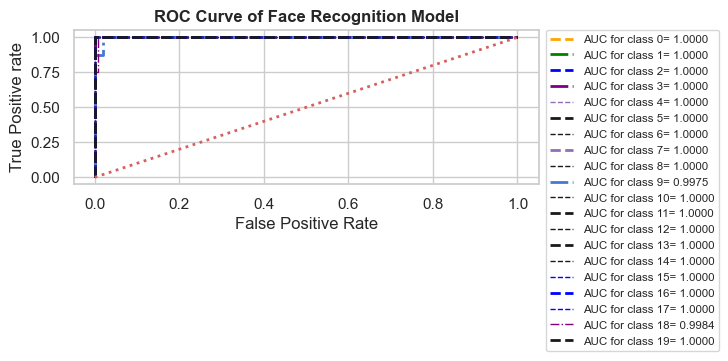

In [70]:
################################################################################################################################
# plot the roc curve for few misclassified faces and few rightly classified faces
################################################################################################################################

sns.set(style='whitegrid', palette='muted', font_scale=1.0)
fpr={}
tpr={}
thresh={}
roc_auc={}
num_classes=20
i=0
while i <20:
    fpr[i], tpr[i],   thresh[i]  = roc_curve(testY, pred[:,i], pos_label=i)
    i+=1
i=0
while i <20:
    roc_auc[i] = auc(fpr[i], tpr[i])
    i+=1


plt.figure(figsize=(6,2))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange',lw=2, label='AUC for class 0= %0.4f'% roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-.',color='green', lw=2, label='AUC for class 1= %0.4f'% roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue',  lw=2, label='AUC for class 2= %0.4f'% roc_auc[2])
plt.plot(fpr[3], tpr[3], linestyle='-.',color='purple',lw=2, label='AUC for class 3= %0.4f'% roc_auc[3])
plt.plot(fpr[4], tpr[4], linestyle='--',color='m',lw=1, label='AUC for class 4= %0.4f'% roc_auc[4])
plt.plot(fpr[5], tpr[5], linestyle='--',color='k',lw=2, label='AUC for class 5= %0.4f'% roc_auc[5])
plt.plot(fpr[6], tpr[6], linestyle='--',color='k',lw=1, label='AUC for class 6= %0.4f'% roc_auc[6])
plt.plot(fpr[7], tpr[7], linestyle='--',color='m',lw=2, label='AUC for class 7= %0.4f'% roc_auc[7])
plt.plot(fpr[8], tpr[8], linestyle='--',color='k',lw=1, label='AUC for class 8= %0.4f'% roc_auc[8])
plt.plot(fpr[9], tpr[9], linestyle='-.',color='b', lw=2, label='AUC for class 9= %0.4f'% roc_auc[9])
plt.plot(fpr[10], tpr[10], linestyle='--',color='k',lw=1, label='AUC for class 10= %0.4f'% roc_auc[10])
plt.plot(fpr[11], tpr[11], linestyle='--',color='k',lw=2, label='AUC for class 11= %0.4f'% roc_auc[11])
plt.plot(fpr[12], tpr[12], linestyle='--',color='k',lw=1, label='AUC for class 12= %0.4f'% roc_auc[12])
plt.plot(fpr[13], tpr[13], linestyle='--',color='k',lw=2, label='AUC for class 13= %0.4f'% roc_auc[13])
plt.plot(fpr[14], tpr[14], linestyle='--',color='k',lw=1, label='AUC for class 14= %0.4f'% roc_auc[14])
plt.plot(fpr[15], tpr[15], linestyle='--',color='blue',lw=1, label='AUC for class 15= %0.4f'% roc_auc[15])
plt.plot(fpr[16], tpr[16], linestyle='--',color='blue',lw=2, label='AUC for class 16= %0.4f'% roc_auc[16])
plt.plot(fpr[17], tpr[17], linestyle='--',color='blue',lw=1, label='AUC for class 17= %0.4f'% roc_auc[17])
plt.plot(fpr[18], tpr[18], linestyle='-.',color='purple', lw=1, label='AUC for class 18= %0.4f'% roc_auc[18])
plt.plot(fpr[19], tpr[19], linestyle='--',color='k',lw=2, label='AUC for class 19= %0.4f'% roc_auc[19])

plt.plot([0,1],[0,1],'r:',lw=2.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve of Face Recognition Model',fontweight='bold') 
plt.grid(True)
plt.legend(loc='best',bbox_to_anchor=(0.9, .54, 0.5, 0.5),fontsize='x-small')
plt.show()


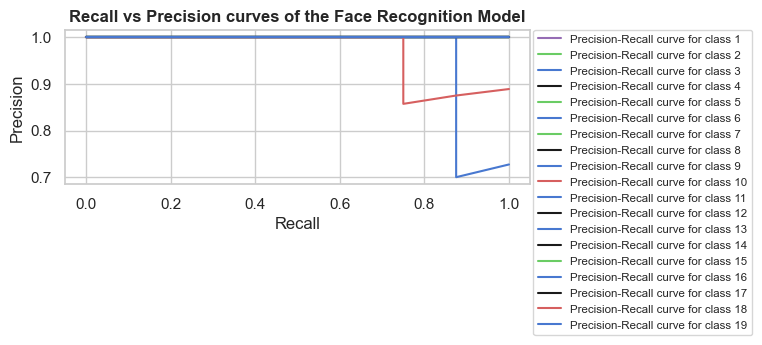

In [71]:
################################################################################################################################
# plot the Recall vs Precision curves of the misclassified faces
################################################################################################################################
num_classes=20
precision={} 
recall={}
thr={}
i=0
while i<num_classes:
    precision[i], recall[i],   thr[i]  = precision_recall_curve(testY, pred[:,i],pos_label=i) 
    i+=1


plt.figure(figsize=(6,2))
plt.plot(recall[1], precision[1], c='m',   label='Precision-Recall curve for class 1')
plt.plot(recall[2], precision[2], c='g',   label='Precision-Recall curve for class 2')
plt.plot(recall[3], precision[3], c='b',   label='Precision-Recall curve for class 3')
plt.plot(recall[4], precision[4], c='k',   label='Precision-Recall curve for class 4')
plt.plot(recall[5], precision[5], c='g',   label='Precision-Recall curve for class 5')
plt.plot(recall[6], precision[6], c='b',   label='Precision-Recall curve for class 6')
plt.plot(recall[7], precision[7], c='g',   label='Precision-Recall curve for class 7')
plt.plot(recall[8], precision[8], c='k',   label='Precision-Recall curve for class 8')
plt.plot(recall[9], precision[9], c='b',   label='Precision-Recall curve for class 9')
plt.plot(recall[10], precision[10], c='r', label='Precision-Recall curve for class 10')
plt.plot(recall[11], precision[11], c='b', label='Precision-Recall curve for class 11')
plt.plot(recall[12], precision[12], c='k', label='Precision-Recall curve for class 12')
plt.plot(recall[13], precision[13], c='b', label='Precision-Recall curve for class 13')
plt.plot(recall[14], precision[14], c='k', label='Precision-Recall curve for class 14')
plt.plot(recall[15], precision[15], c='g', label='Precision-Recall curve for class 15')
plt.plot(recall[16], precision[16], c='b', label='Precision-Recall curve for class 16')
plt.plot(recall[17], precision[17], c='k', label='Precision-Recall curve for class 17')
plt.plot(recall[18], precision[18], c='r', label='Precision-Recall curve for class 18')
plt.plot(recall[19], precision[19], c='b', label='Precision-Recall curve for class 19')

plt.title('Recall vs Precision curves of the Face Recognition Model',fontweight='bold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(bbox_to_anchor=(0.99, .54, 0.5, 0.5),fontsize='x-small')
plt.show()

In [72]:
################################################################################################################################
# print the classification report of  the test cases for all the 20 classes
################################################################################################################################
LABELS=['Class  0','Class  1','Class  2','Class  3','Class  4','Class  5','Class  6','Class  7','Class  8','Class  9','Class 10',\
        'Class 11','Class 12','Class 13','Class 14','Class 15','Class 16','Class 17','Class 18','Class 19']
PRT = classification_report(testY, predclass,target_names=LABELS)
print(PRT)


              precision    recall  f1-score   support

    Class  0       1.00      1.00      1.00         8
    Class  1       1.00      1.00      1.00         8
    Class  2       1.00      1.00      1.00         8
    Class  3       1.00      1.00      1.00         8
    Class  4       1.00      0.75      0.86         8
    Class  5       1.00      1.00      1.00         8
    Class  6       1.00      1.00      1.00         8
    Class  7       0.67      1.00      0.80         8
    Class  8       1.00      1.00      1.00         8
    Class  9       1.00      0.75      0.86         8
    Class 10       1.00      1.00      1.00         8
    Class 11       1.00      1.00      1.00         8
    Class 12       1.00      1.00      1.00         8
    Class 13       1.00      1.00      1.00         8
    Class 14       1.00      1.00      1.00         8
    Class 15       1.00      0.88      0.93         8
    Class 16       0.89      1.00      0.94         8
    Class 17       0.80    

In [73]:
################################################################################################################################
# print the accuracy score one more time
################################################################################################################################
print('Accuracy Score is :',accuracy_score(testY, predclass))

Accuracy Score is : 0.95625


In [74]:
printmd('Accuracy of the CNN Face Recognition Model is 95.63% . ')

## <span style="color:red">Accuracy of the CNN Face Recognition Model is 95.63% . </span>

In [75]:
printmd('Below are the 7 misidentified faces out of total 160 test cases. ')

## <span style="color:red">Below are the 7 misidentified faces out of total 160 test cases. </span>

In [76]:
################################################################################################################################
# plot misclassified faces and the original faces
################################################################################################################################
print('Two of the below faces were misidentified by the model'.center(120))
for j , m in enumerate((18,7),0):
    n=m*8    
    plt.subplots_adjust(hspace=1e-20,wspace=1e-20,bottom=.01,top=1.0,left=.01,right=1.9)
    for i in range(0,8): 
        k = j+1
        plt.subplot(k,8,i+1) 
        plt.axis('off')
        img=testX[n,:].reshape(112,92,1)
        plt.imshow(img,'gray', interpolation='nearest',origin='upper',extent=(-0.5, 0.5, -0.45, 0.55),aspect=1.2) 
        n=n + 1
        if ((j == 0) & ((i== 2)|(i== 6))): 
            plt.title('Actual Face',fontweight='bold')
        elif ((j == 1) & ((i== 2)|(i== 6))):
            plt.title('Predicted Face',fontweight='bold')
    
    plt.show()

plt.show()


                                 Two of the below faces were misidentified by the model                                 


                                 One of the below faces was misidentified by the model                                  


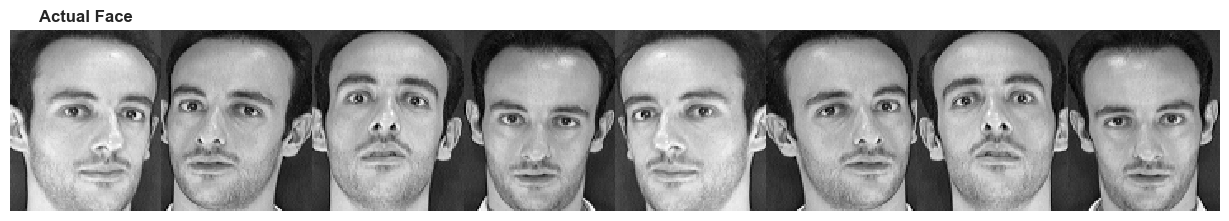

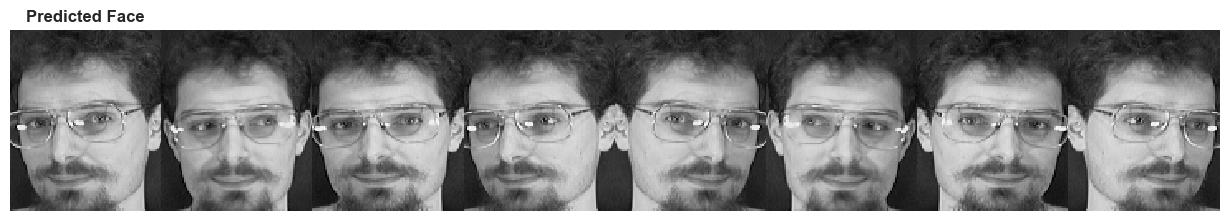

In [77]:
################################################################################################################################
# plot the misclassifeid faces and the original facese
################################################################################################################################
print('One of the below faces was misidentified by the model'.center(120))
for j , m in enumerate((15,16),0):
    
    n=m*8    
    plt.subplots_adjust(hspace=1e-20,wspace=1e-20,bottom=.01,top=1.0,left=.01,right=1.9)
    for i in range(0,8): 
        k = j+1
        plt.subplot(k,8,i+1) 
        plt.axis('off')
        img=testX[n,:].reshape(112,92,1)
        plt.imshow(img,'gray', interpolation='nearest',origin='upper',extent=(-0.5, 0.5, -0.45, 0.55),aspect=1.2) 
        n=n + 1
        
        if ((j == 0) & (i== 0)): 
            plt.title('Actual Face',fontweight='bold')
        elif ((j == 1) & (i==0)):
            plt.title('Predicted Face',fontweight='bold')
    
    plt.show()

plt.show()

                                 Two of the below faces were misidentified by the model                                 


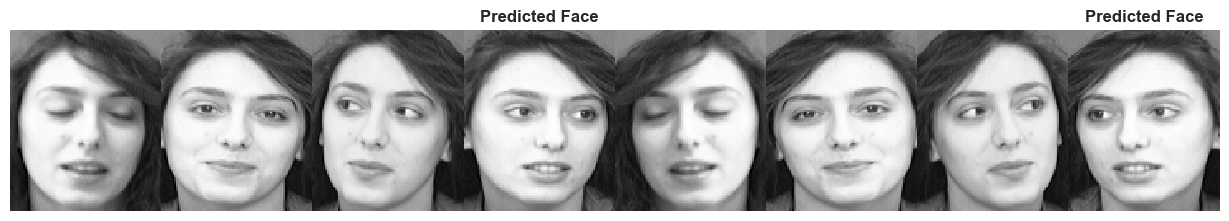

In [78]:
################################################################################################################################
# plot the misclassifeid faces and the original facese
################################################################################################################################
print('Two of the below faces were misidentified by the model'.center(120))
for j , m in enumerate((9,7),0):
    n=m*8    
    plt.subplots_adjust(hspace=1e-20,wspace=1e-20,bottom=.01,top=1.0,left=.01,right=1.9)
    for i in range(0,8): 
        
        k = j+1
        plt.subplot(k,8,i+1) 
        plt.axis('off')
        img=testX[n,:].reshape(112,92,1)
        plt.imshow(img,'gray', interpolation='nearest',origin='upper',extent=(-0.5, 0.5, -0.45, 0.55),aspect=1.2) 
        n=n + 1
        if ((j == 0) & ((i== 3)|(i== 7))): 
            plt.title('Actual Face',fontweight='bold')
        elif ((j == 1) & ((i== 3)|(i== 7))):
            plt.title('Predicted Face',fontweight='bold')
    
    plt.show()

plt.show()

                                 Two of the below faces were misidentified by the model                                 


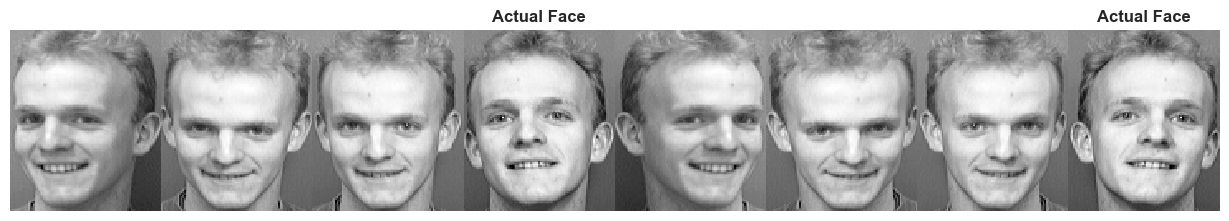

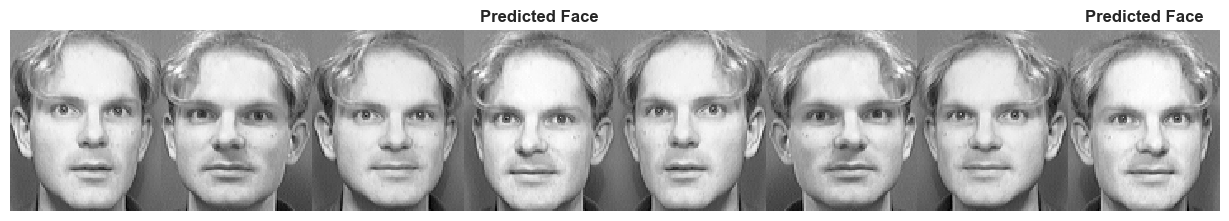

In [79]:
################################################################################################################################
# plot the misclassifeid faces and the original facese
################################################################################################################################
print('Two of the below faces were misidentified by the model'.center(120))
for j , m in enumerate((4,17),0):
    n=m*8    
    plt.subplots_adjust(hspace=1e-20,wspace=1e-20,bottom=.01,top=1.9,left=.01,right=1.9)
    for i in range(0,8): 
        k = j+1
        plt.subplot(k,8,i+1) 
        plt.axis('off')
        img=testX[n,:].reshape(112,92,1)
        plt.imshow(img,'gray', interpolation='nearest',origin='upper',extent=(-0.5, 0.5, -0.45, 0.55),aspect=1.2) 
        n=n + 1
        if ((j == 0) & ((i== 3)|(i== 7))): 
            plt.title('Actual Face',fontweight='bold')
        elif ((j == 1) & ((i== 3)|(i== 7))):
            plt.title('Predicted Face',fontweight='bold')
    
    plt.show()

plt.show()